## Chalcogenide perovskite stability based on $\tau*$

The Figure 2, in the paper can be obtained based on the experimental data were SISSO was trained as well as the determined thresholds.

In [1]:
from tf_chpvk_pv.config import RESULTS_DIR
import pandas as pd
import pickle

df = pd.read_csv(RESULTS_DIR / "processed_chpvk_concat_dataset.csv")

df.rename(columns={"t_jess": "t*",
                   "t_sisso": "tau*",
                   "p_t_sisso": "p_tau*"}, inplace=True)

2026-02-20 09:57:31.987 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/dagar/TF-ChPVK-PV


a. Modified tolerance factor distribution on the experimental perovskite data used for training

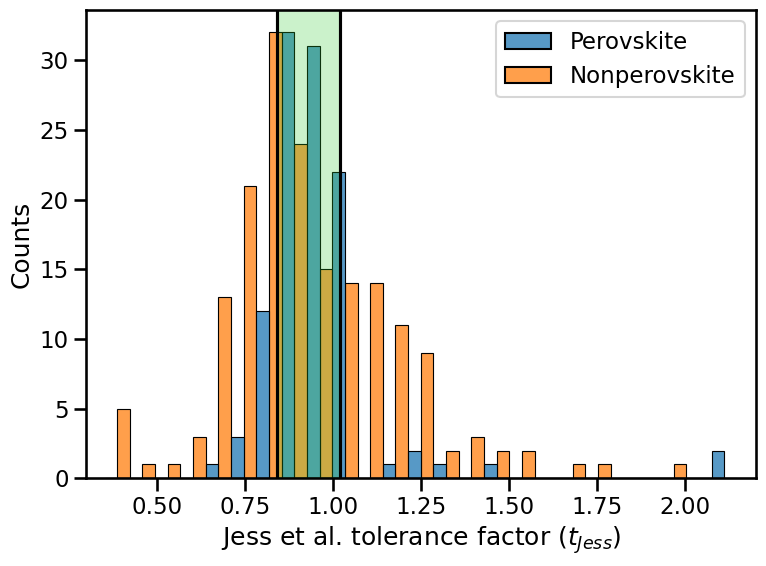

In [2]:
from tf_chpvk_pv.plots import plot_t_star_histogram

plot_t_star_histogram(thresholds=[0.84,1.02], df=df)

b. New $\tau*$ tolerance factor distribution on the experimental perovskite data

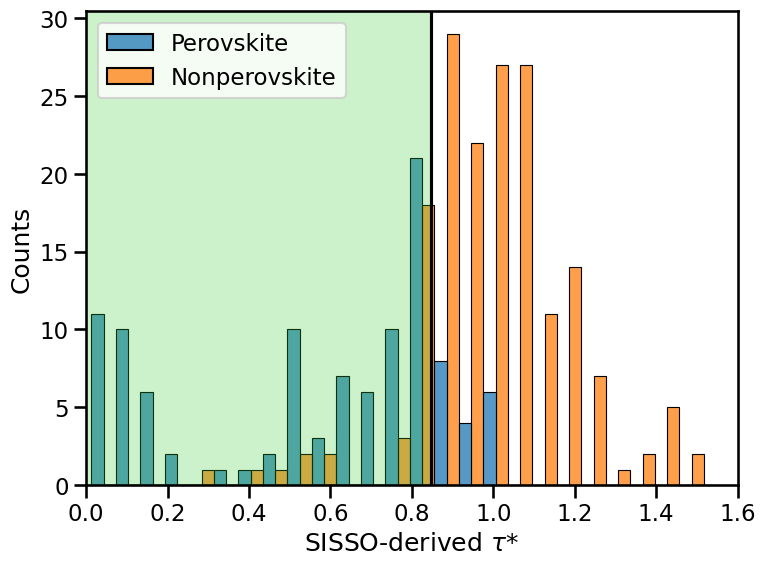

In [3]:
from tf_chpvk_pv.plots import plot_tau_star_histogram

plot_tau_star_histogram(threshold=0.846, df=df)

c. Plat scaling probability of phase stability based on the new $\tau*$ as a function of the modified tolerance factor for the experimental perovskite data

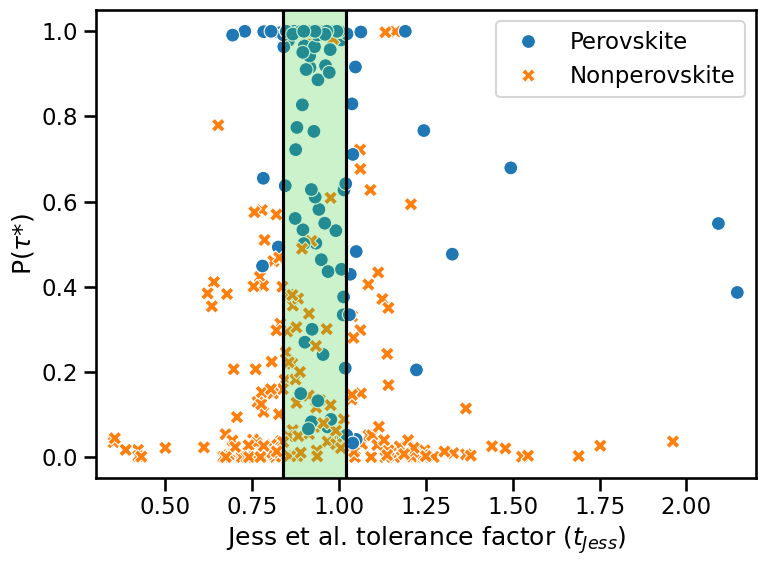

In [4]:
from tf_chpvk_pv.plots import plot_t_star_vs_p_t_sisso

plot_t_star_vs_p_t_sisso(df=df, thresholds=[0.84,1.02])

d. Elemental distribution of the predicted perovskite phases with a $\tau* < 0.496$

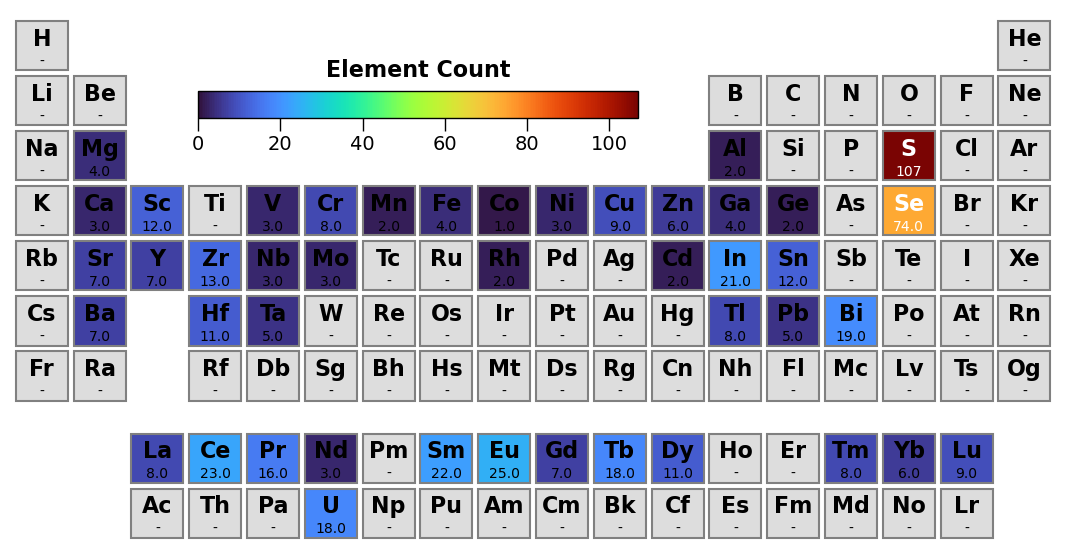

In [5]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import graph_periodic_table

df_candidates = pd.read_csv(PROCESSED_DATA_DIR / "stable_compositions.csv")

df_candidates.rename(columns={'Unnamed: 0': 'material'}, inplace=True)

graph_periodic_table(df_candidates.material.tolist())

## $\tau*$ dependence on the radii

2026-02-20 09:57:54.961 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:75 - Training Platt scaling model...
2026-02-20 09:57:55.341 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:91 - Platt scaling model training complete.


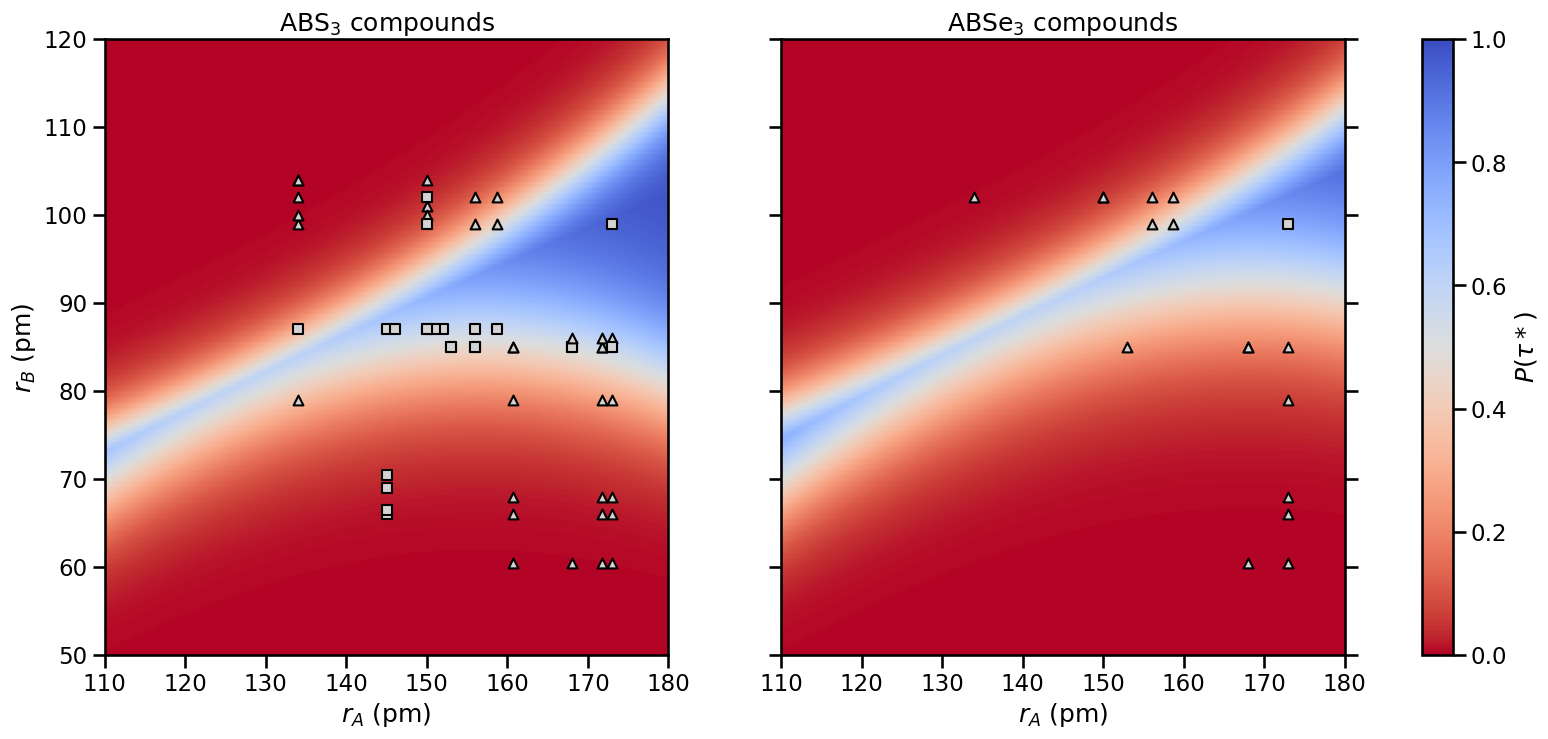

In [6]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import colormap_radii
import pandas as pd

df_exp = pd.read_csv(PROCESSED_DATA_DIR / "chpvk_dataset.csv")

df_exp.set_index('material', inplace=True)

df = pd.read_csv(PROCESSED_DATA_DIR / "valid_new_compositions.csv")

colormap_radii(df=df, exp_df=df_exp)

2026-02-20 10:01:12.563 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:75 - Training Platt scaling model...
2026-02-20 10:01:12.610 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:91 - Platt scaling model training complete.


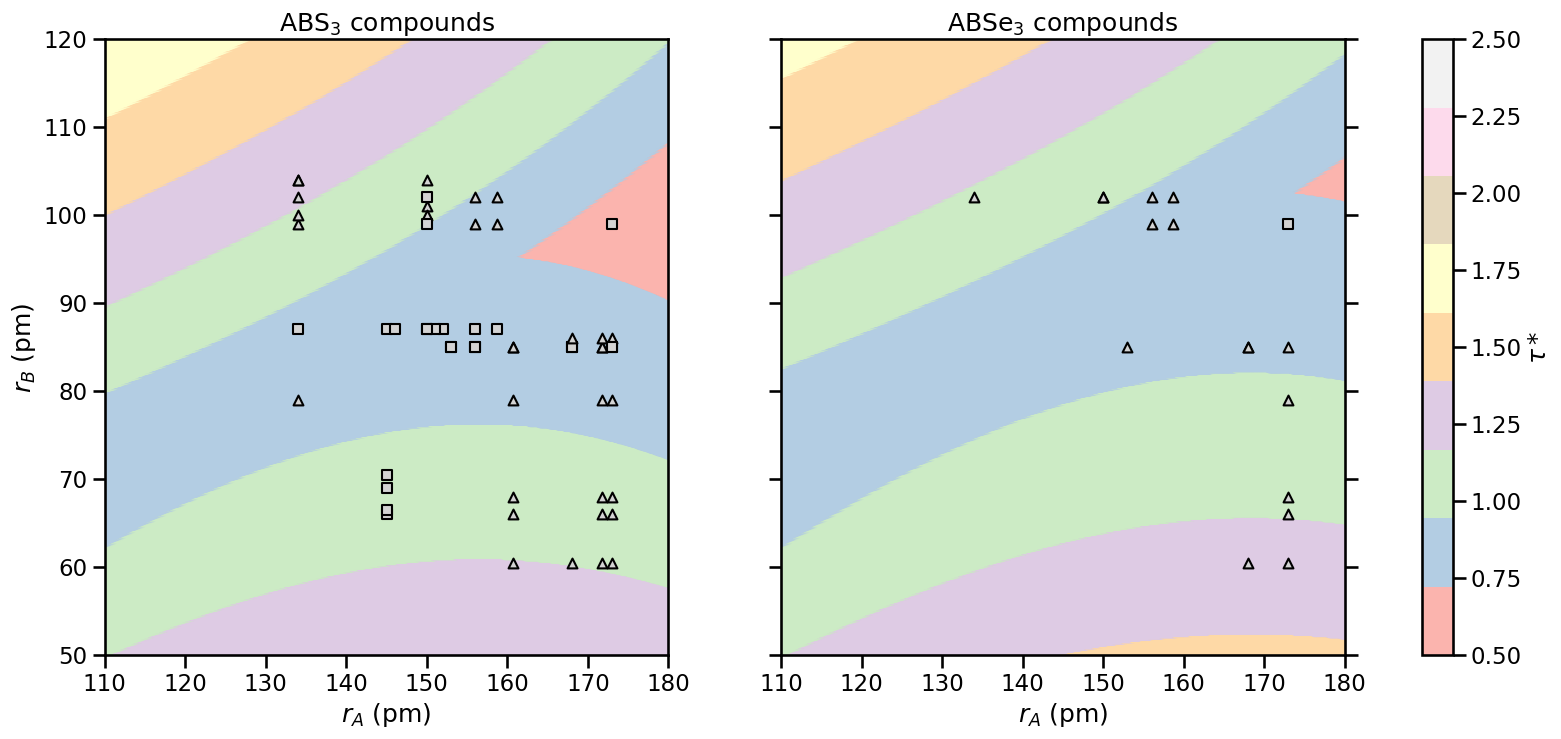

In [7]:
colormap_radii(df=df, exp_df=df_exp, t_sisso=True)

## Bandgap estimation

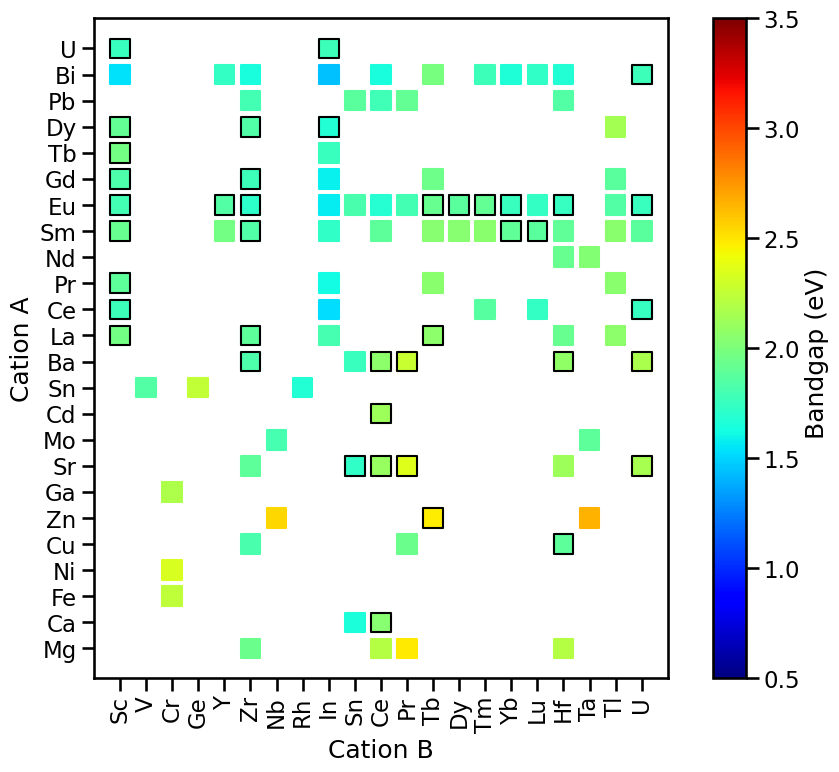

In [8]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import plot_matrix
import pandas as pd

df_crystal = pd.read_csv(PROCESSED_DATA_DIR / "results_CrystaLLM_with_bandgap.csv")

df_sisso = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_bandgap.csv")

#remove from the sisso data frame the entries that are not in the crystal dataframe
#df_sisso = df_sisso[df_sisso['formula'].isin(df_crystal['formula'])]

df_sisso.rename(columns={'bandgap':'Eg'}, inplace=True)
df_crystal.rename(columns={'bandgap':'Eg'}, inplace=True)

plot_matrix(df_sisso, df_crystal, anion='S')

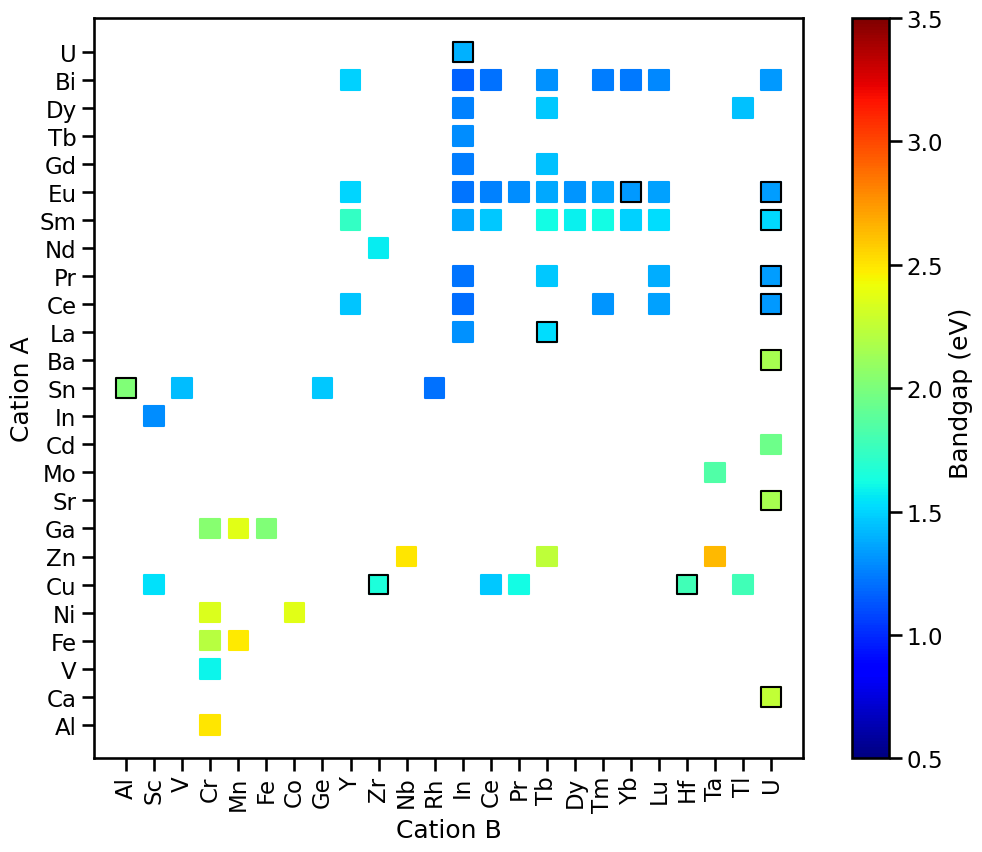

In [9]:
plot_matrix(df_sisso, df_crystal, anion='Se')

2026-02-20 10:04:41.361 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:75 - Training Platt scaling model...
2026-02-20 10:04:41.425 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:91 - Platt scaling model training complete.


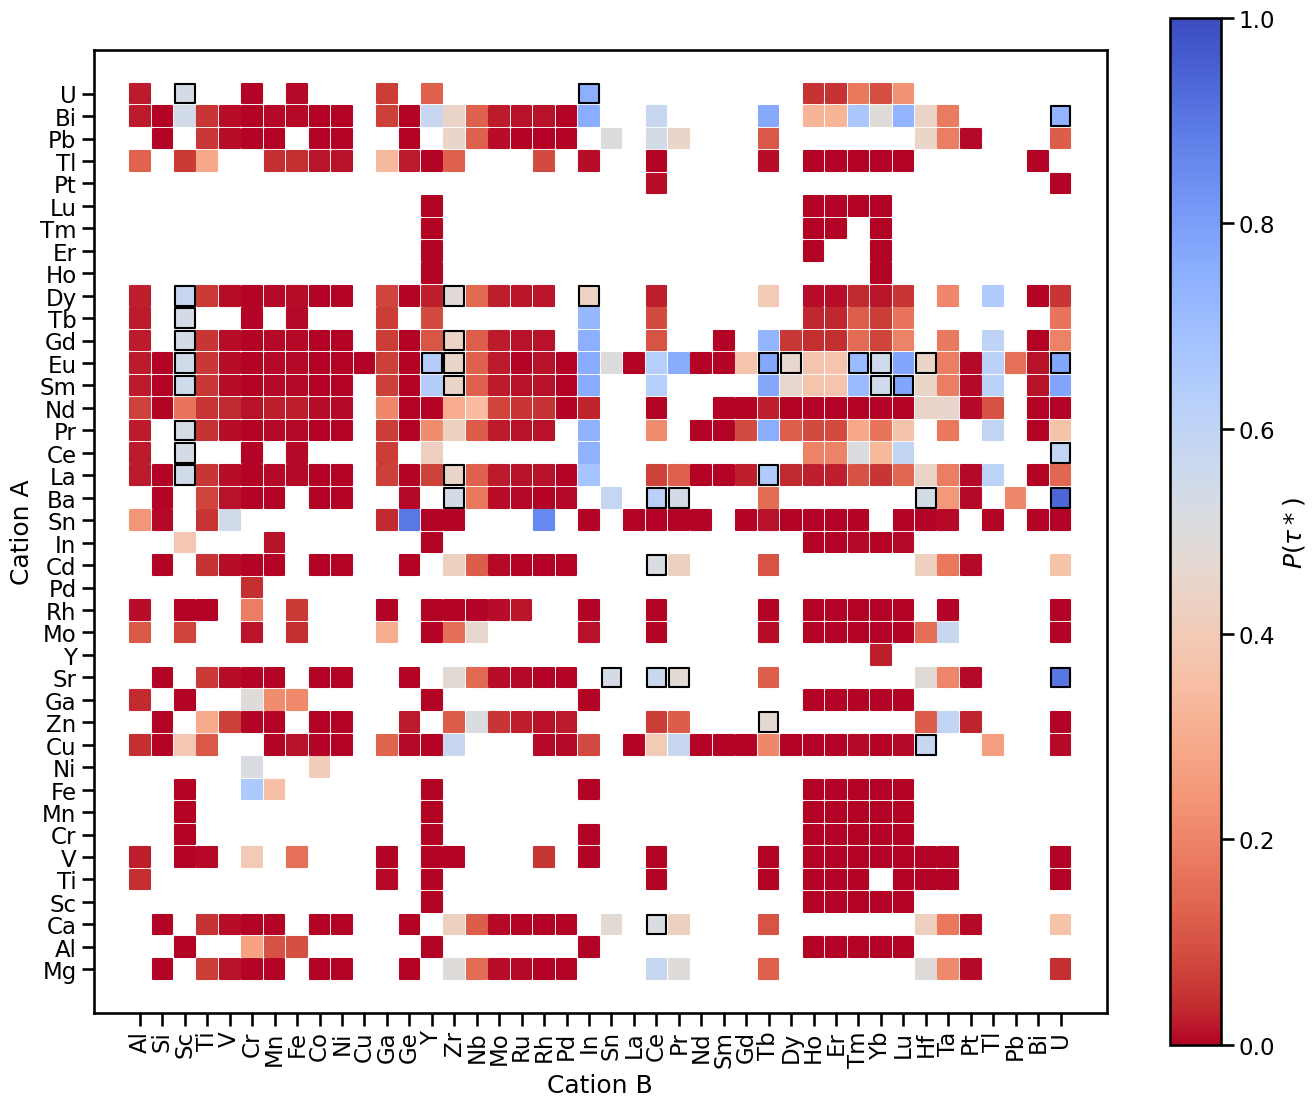

In [10]:
df_possible = pd.read_csv(PROCESSED_DATA_DIR / "valid_new_compositions.csv")
df_possible.rename(columns={'Unnamed: 0':'formula'}, inplace=True)

plot_matrix(df_possible, df_crystal, anion='S', parameter='p_t_sisso')

2026-02-20 10:04:53.804 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:75 - Training Platt scaling model...
2026-02-20 10:04:53.874 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:91 - Platt scaling model training complete.


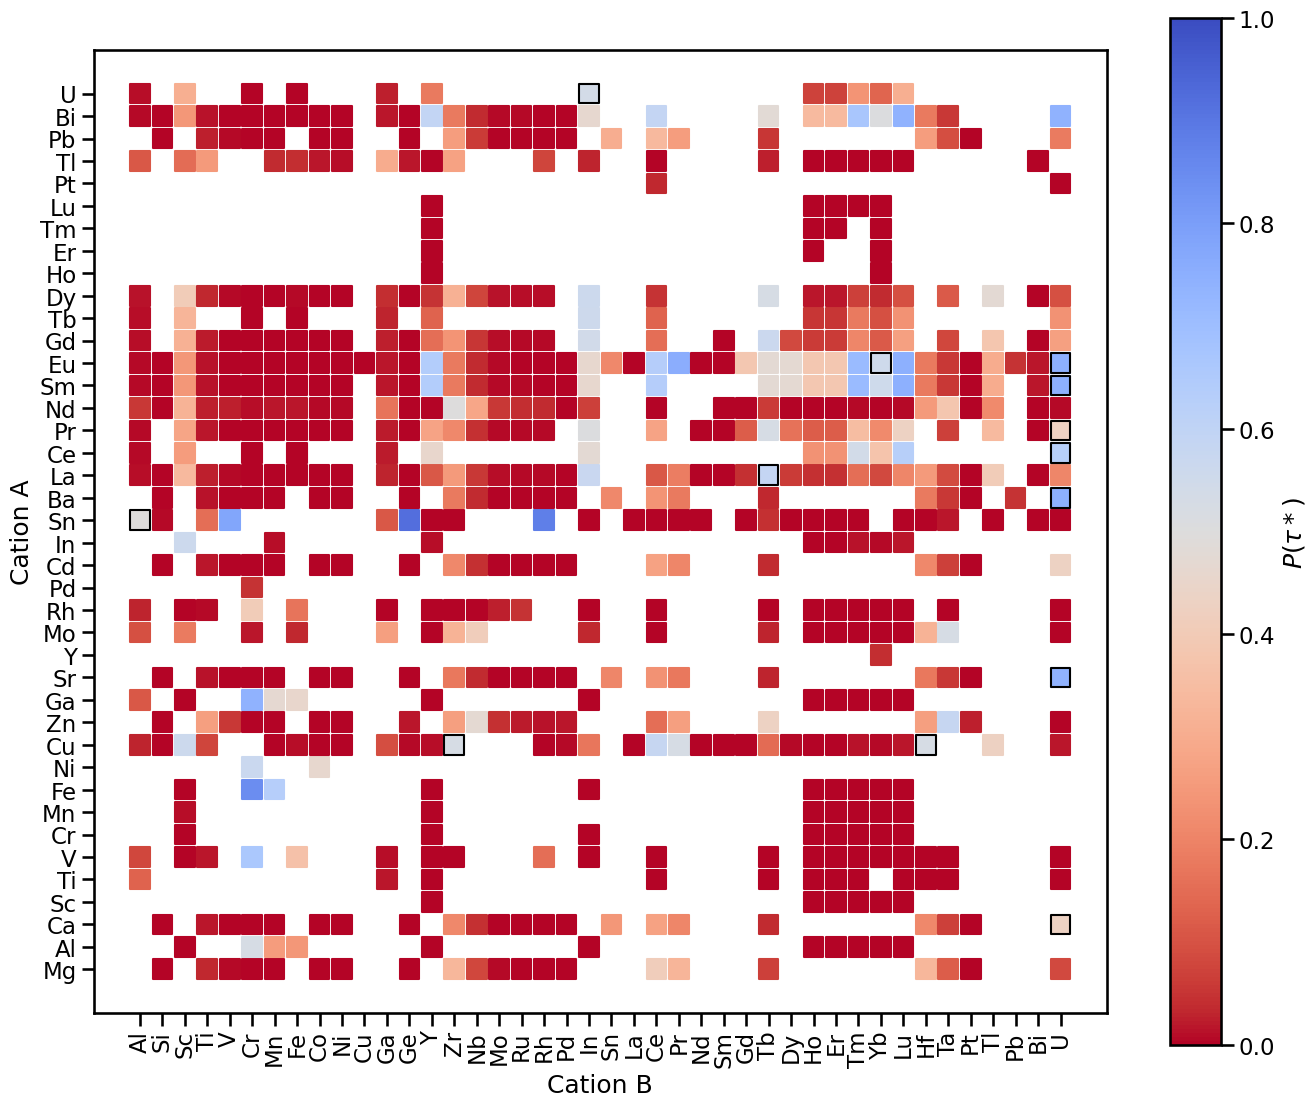

In [11]:
plot_matrix(df_possible, df_crystal, anion='Se', parameter='p_t_sisso')

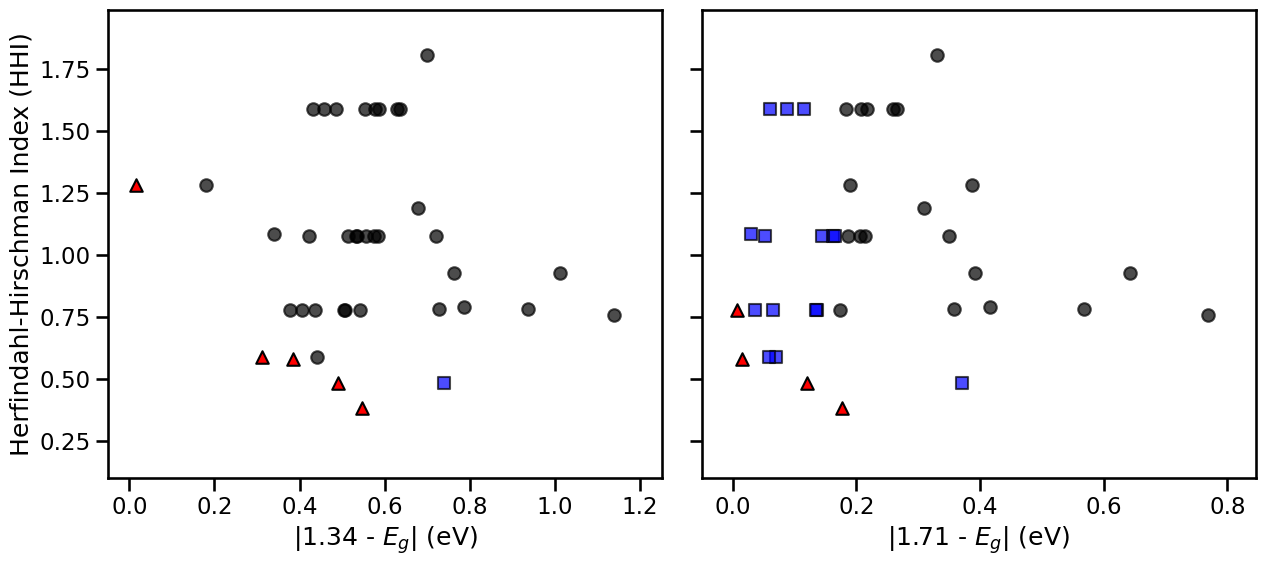

In [12]:
from tf_chpvk_pv.plots import pareto_front_plot, normalize_abx3
from tf_chpvk_pv.config import PROCESSED_DATA_DIR, FIGURES_DIR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_sisso = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_bandgap.csv")
df_crystal = pd.read_csv(PROCESSED_DATA_DIR / "results_CrystaLLM_with_bandgap.csv")
df_hhi = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_HHI.csv")

df_CLscore = pd.read_csv(PROCESSED_DATA_DIR / "final_CL_scores.csv")

df_CLscore.rename(columns={'Composition':'formula'}, inplace=True)
df_CLscore['formula'] = df_CLscore['formula'].str.replace(" ", "").str.replace("1", "")

df_hhi.rename(columns={'material':'formula'}, inplace=True)

df_sisso["norm_formula"] = df_sisso["formula"].apply(normalize_abx3)
df_crystal["norm_formula"] = df_crystal["formula"].apply(normalize_abx3)

df_crystal_sisso = df_sisso[df_sisso['norm_formula'].isin(df_crystal['norm_formula'])]

df_crystal_sisso_hhi = df_crystal_sisso[['formula', 'A', 'B', 'X', 'bandgap', 'bandgap_sigma', 't_sisso']]

df_crystal_sisso_hhi = df_crystal_sisso_hhi.merge(df_hhi[['formula', 'HHI', 'SR']], on='formula', how='left')

df_crystal_sisso_hhi_cl = df_crystal_sisso_hhi.merge(df_CLscore[['formula', 'CL score', 'CL score std']], on='formula', how='left')

sns.set_context('talk')
fig, ax = plt.subplots(1, 2, figsize=(13, 6), tight_layout=True)

pareto_front_plot(df_crystal_sisso_hhi, "HHI", Eg_ref=1.34, ax=ax[0])
pareto_front_plot(df_crystal_sisso_hhi, "HHI", Eg_ref=1.71, ax=ax[1], same_y_axis=True)

fig.savefig(FIGURES_DIR / "pareto_front_HHI_Eg.png", dpi=300)

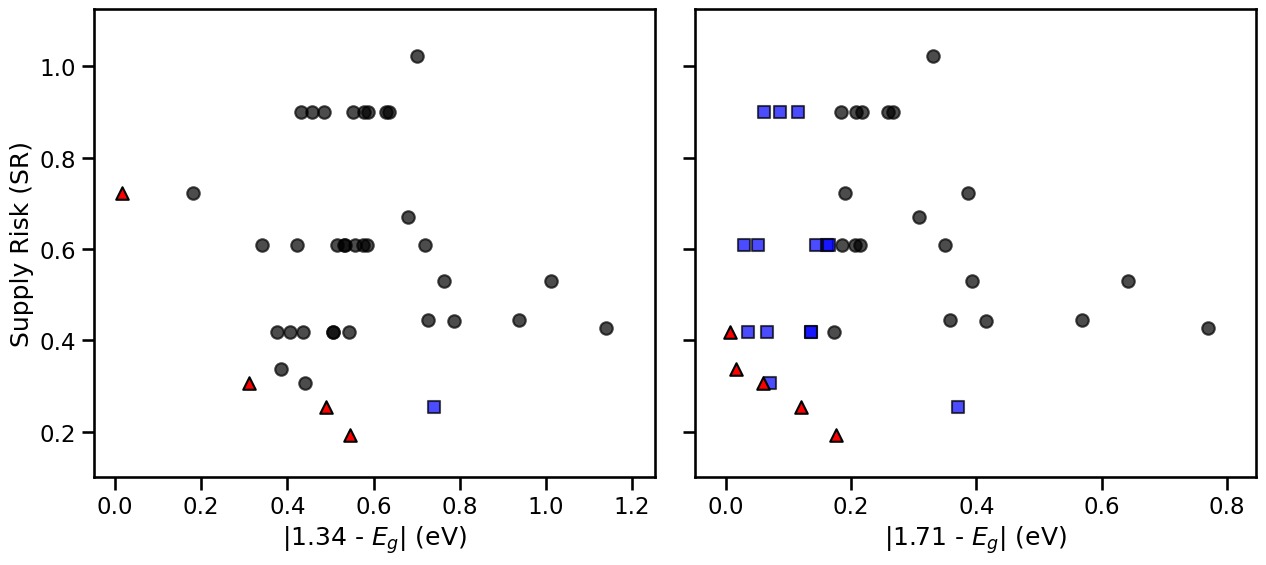

In [13]:
sns.set_context('talk')
fig, ax = plt.subplots(1, 2, figsize=(13, 6), tight_layout=True)

pareto_front_plot(df_crystal_sisso_hhi, "SR", Eg_ref=1.34, ax=ax[0])
pareto_front_plot(df_crystal_sisso_hhi, "SR", Eg_ref=1.71, ax=ax[1], same_y_axis=True)

fig.savefig(FIGURES_DIR / "pareto_front_SR_Eg.png", dpi=300)

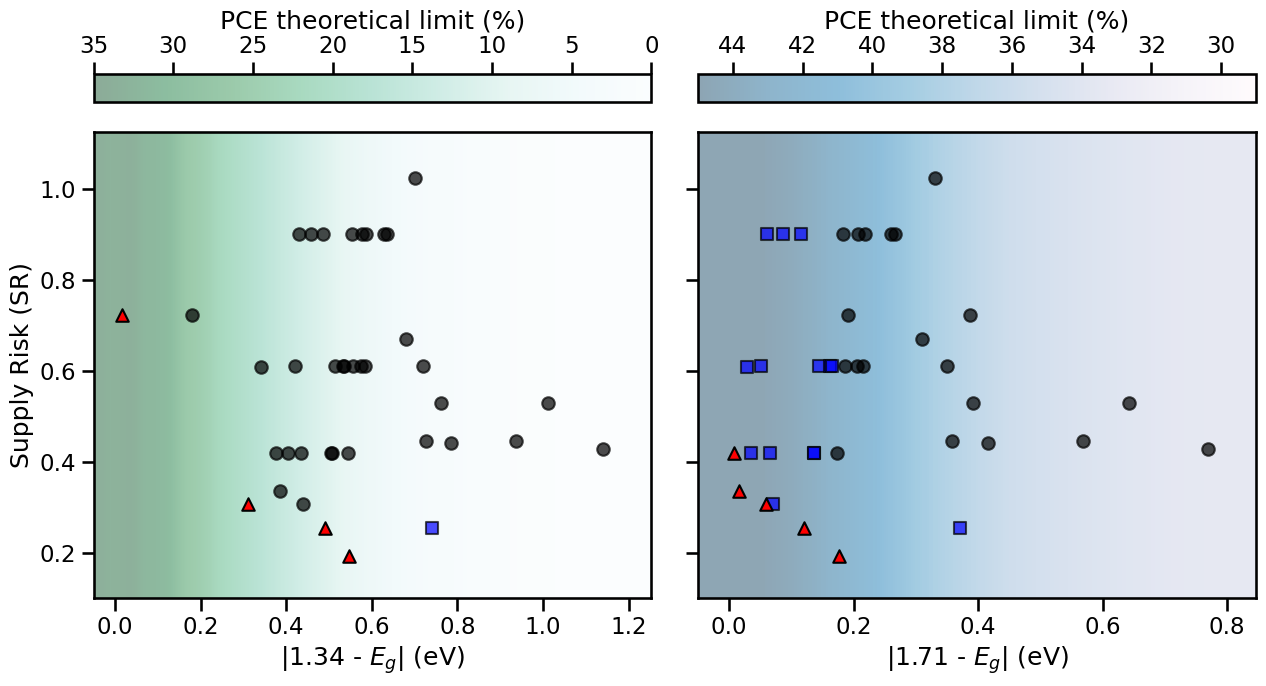

In [14]:
sns.set_context('talk')
fig, ax = plt.subplots(1, 2, figsize=(13, 7.2), tight_layout=True)

pareto_front_plot(df_crystal_sisso_hhi, "SR", Eg_ref=1.34, ax=ax[0], plot_PCE=True)#, plot_names=True)
pareto_front_plot(df_crystal_sisso_hhi, "SR", Eg_ref=1.71, ax=ax[1], same_y_axis=True, plot_PCE=True)#, plot_names=True)

fig.savefig(FIGURES_DIR / "pareto_front_SR_Eg_color.png", dpi=300)

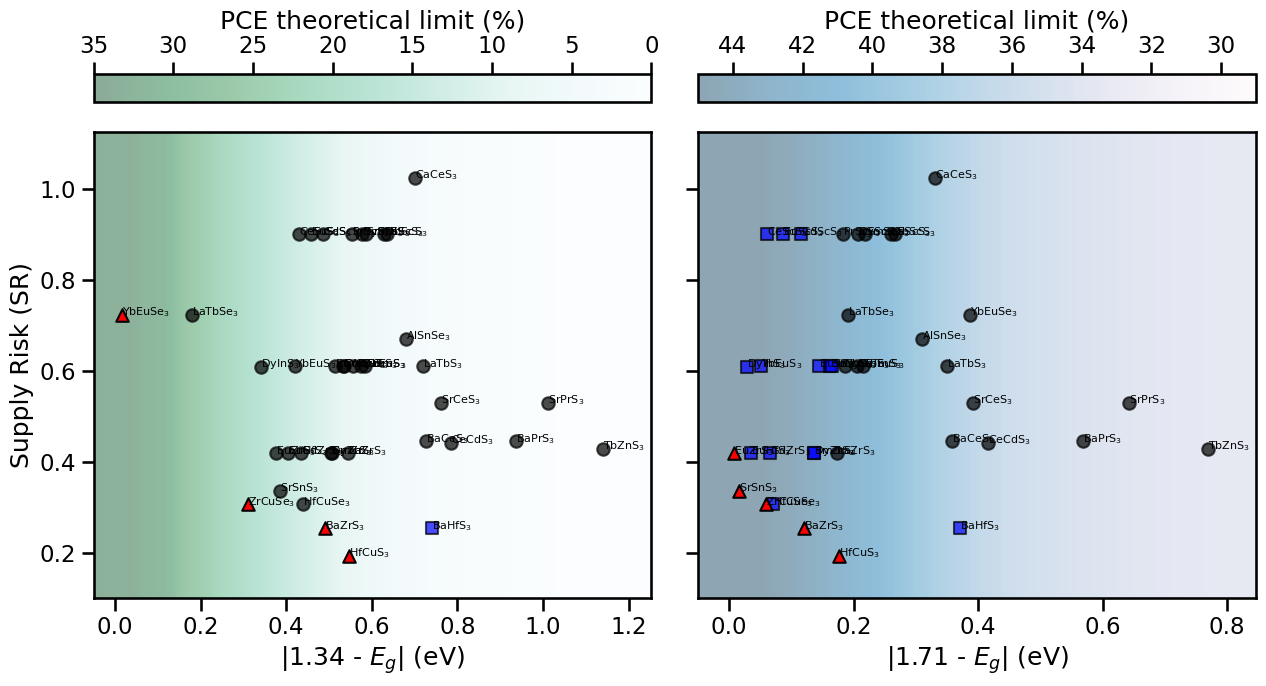

In [15]:
sns.set_context('talk')
fig, ax = plt.subplots(1, 2, figsize=(13, 7.2), tight_layout=True)

pareto_front_plot(df_crystal_sisso_hhi, "SR", Eg_ref=1.34, ax=ax[0], plot_PCE=True, plot_names=True)
pareto_front_plot(df_crystal_sisso_hhi, "SR", Eg_ref=1.71, ax=ax[1], same_y_axis=True, plot_PCE=True, plot_names=True)

fig.savefig(FIGURES_DIR / "pareto_front_SR_Eg_color_with_names.png", dpi=300)

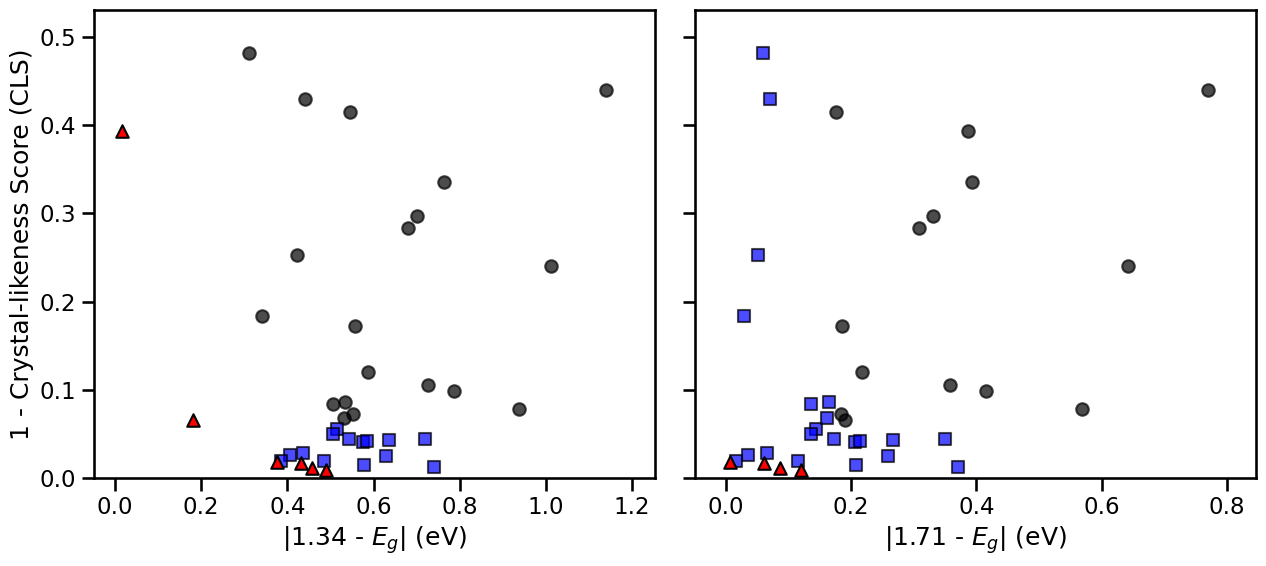

In [16]:
df_crystal_sisso_hhi_cl['1-CL score'] = 1 - df_crystal_sisso_hhi_cl['CL score']

fig, ax = plt.subplots(1, 2, figsize=(13, 6), tight_layout=True)

pareto_front_plot(df_crystal_sisso_hhi_cl, '1-CL score', Eg_ref=1.34, ax=ax[0])
pareto_front_plot(df_crystal_sisso_hhi_cl, '1-CL score', Eg_ref=1.71, ax=ax[1], same_y_axis=True)

fig.savefig(FIGURES_DIR / "pareto_front_CL_score_Eg.png", dpi=300)

Pareto front for Single Junction bandgap (1.34 eV):
    formula   bandgap  bandgap_sigma        SR  CL score  CL score std
3    BaZrS3  1.830428       0.462576  0.253883  0.990686      0.023706
5   YbEuSe3  1.323443       0.257468  0.722642  0.606555      0.370987
9    EuScS3  1.796980       0.491304  0.899136  0.987745      0.019361
11   EuZrS3  1.716936       0.417492  0.418379  0.981398      0.030479
13   SrSnS3  1.725597       0.385283  0.336384  0.980511      0.035993
19   HfCuS3  1.886006       0.613252  0.193227  0.585012      0.343796
20  HfCuSe3  1.780256       0.595717  0.306538  0.570439      0.359910
21  ZrCuSe3  1.650962       0.588309  0.306538  0.518085      0.336762
26  LaTbSe3  1.519861       0.213884  0.722642  0.933765      0.135434
28   CeScS3  1.770758       0.442013  0.899136  0.982454      0.030949
37   DyInS3  1.681060       0.204622  0.608731  0.816403      0.250659

Pareto front for Tandem configuration bandgap (1.71 eV):
    formula   bandgap  bandgap_sigma  

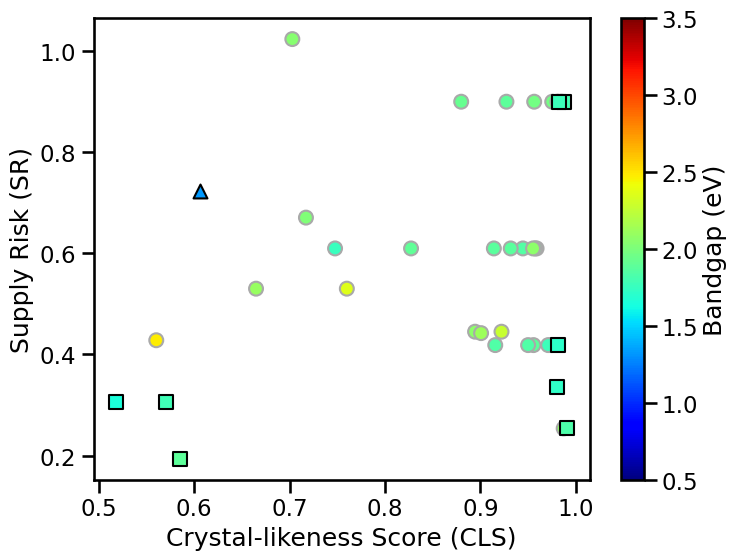

In [17]:
from tf_chpvk_pv.plots import plot_pareto_3fronts

plot_pareto_3fronts(df_crystal_sisso_hhi_cl, print_tables=True)

Pareto front for Single Junction bandgap (1.34 eV):
    formula   bandgap  bandgap_sigma        SR  CL score  CL score std
3    BaZrS3  1.830428       0.462576  0.253883  0.990686      0.023706
5   YbEuSe3  1.323443       0.257468  0.722642  0.606555      0.370987
9    EuScS3  1.796980       0.491304  0.899136  0.987745      0.019361
11   EuZrS3  1.716936       0.417492  0.418379  0.981398      0.030479
13   SrSnS3  1.725597       0.385283  0.336384  0.980511      0.035993
19   HfCuS3  1.886006       0.613252  0.193227  0.585012      0.343796
20  HfCuSe3  1.780256       0.595717  0.306538  0.570439      0.359910
21  ZrCuSe3  1.650962       0.588309  0.306538  0.518085      0.336762
26  LaTbSe3  1.519861       0.213884  0.722642  0.933765      0.135434
28   CeScS3  1.770758       0.442013  0.899136  0.982454      0.030949
37   DyInS3  1.681060       0.204622  0.608731  0.816403      0.250659

Pareto front for Tandem configuration bandgap (1.71 eV):
    formula   bandgap  bandgap_sigma  

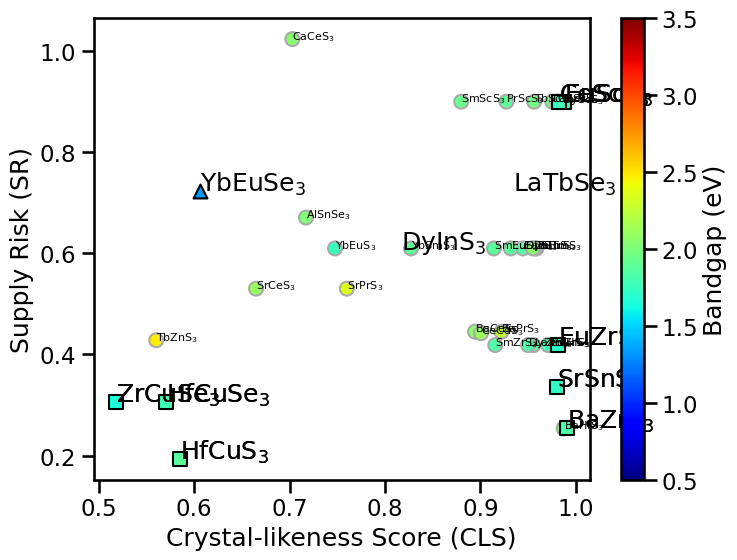

In [18]:
plot_pareto_3fronts(df_crystal_sisso_hhi_cl, print_tables=True, plot_names=True)

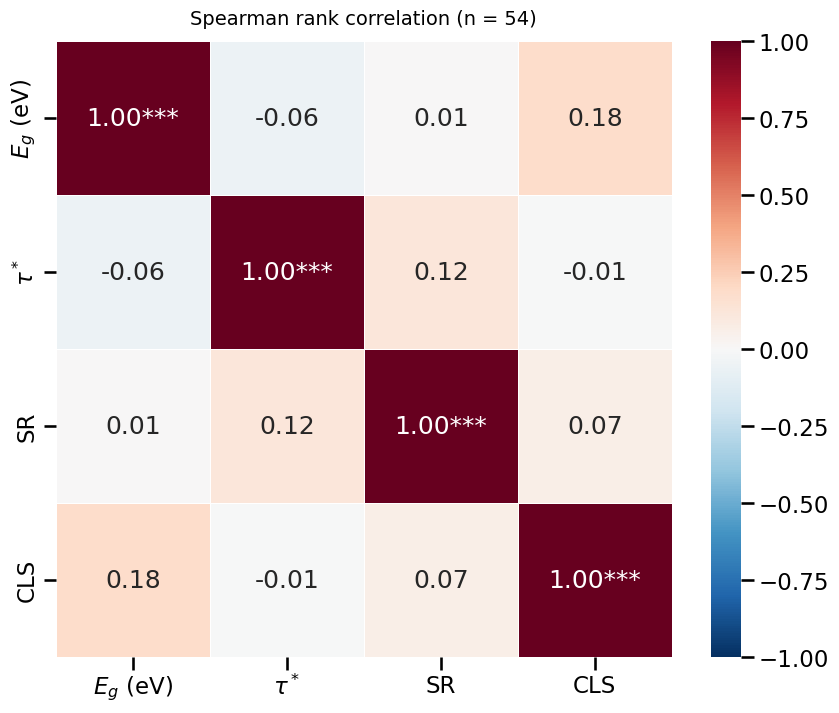


Spearman rank correlations (n = 54):
------------------------------------------------------------
    $E_g$ (eV) vs $\tau^*$    : ρ = -0.061 (weak negative, p = 0.6628)  → INDEPENDENT
    $E_g$ (eV) vs SR          : ρ = +0.006 (weak positive, p = 0.9667)  → INDEPENDENT
    $E_g$ (eV) vs CLS         : ρ = +0.180 (weak positive, p = 0.1933)  → INDEPENDENT
      $\tau^*$ vs SR          : ρ = +0.124 (weak positive, p = 0.3731)  → INDEPENDENT
      $\tau^*$ vs CLS         : ρ = -0.006 (weak negative, p = 0.9666)  → INDEPENDENT
            SR vs CLS         : ρ = +0.070 (weak positive, p = 0.6161)  → INDEPENDENT

* p < 0.05, ** p < 0.01, *** p < 0.001
Low |ρ| values indicate metrics capture independent material characteristics.


In [19]:
from tf_chpvk_pv.plots import corr_matrix

metrics = ['bandgap',  't_sisso', 'SR', 'CL score']
dict_labels = {'bandgap': '$E_g$ (eV)', 't_sisso': '$\\tau^*$', 'SR': 'SR', 'CL score': 'CLS'} 

corr_matrix(df_crystal_sisso_hhi_cl, metrics, dict_labels)

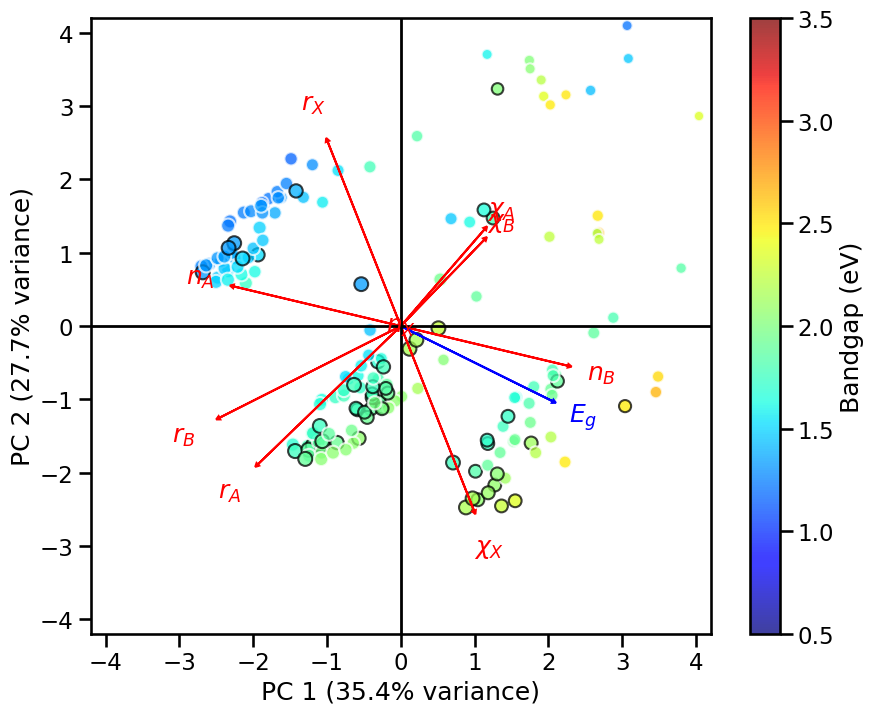

In [20]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.features import perform_pca
from tf_chpvk_pv.plots import plot_PCA, normalize_abx3
import pandas as pd

df_sisso = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_bandgap.csv")
df_crystal = pd.read_csv(PROCESSED_DATA_DIR / "results_CrystaLLM_with_bandgap.csv")

df_sisso["norm_formula"] = df_sisso["formula"].apply(normalize_abx3)
df_crystal["norm_formula"] = df_crystal["formula"].apply(normalize_abx3)

df_crystal_sisso = df_sisso[df_sisso['norm_formula'].isin(df_crystal['norm_formula'])]

df_sisso['color_edge'] = 'w'
df_sisso.loc[df_sisso['formula'].isin(df_crystal_sisso['formula']), 'color_edge'] = 'k'

varibles = ['A', 'B', 'X', 'nA', 'nB', 'nX', 'chi_A', 'chi_B', 'chi_X',
       'rX', 'rA', 'rB']

target = ['bandgap']

df_scaled, df_pca, component_loadings, explained_variance_ratio, pca = perform_pca(df_sisso, varibles, target)
plot_PCA(df_scaled, df_pca, df_sisso, component_loadings, pca)

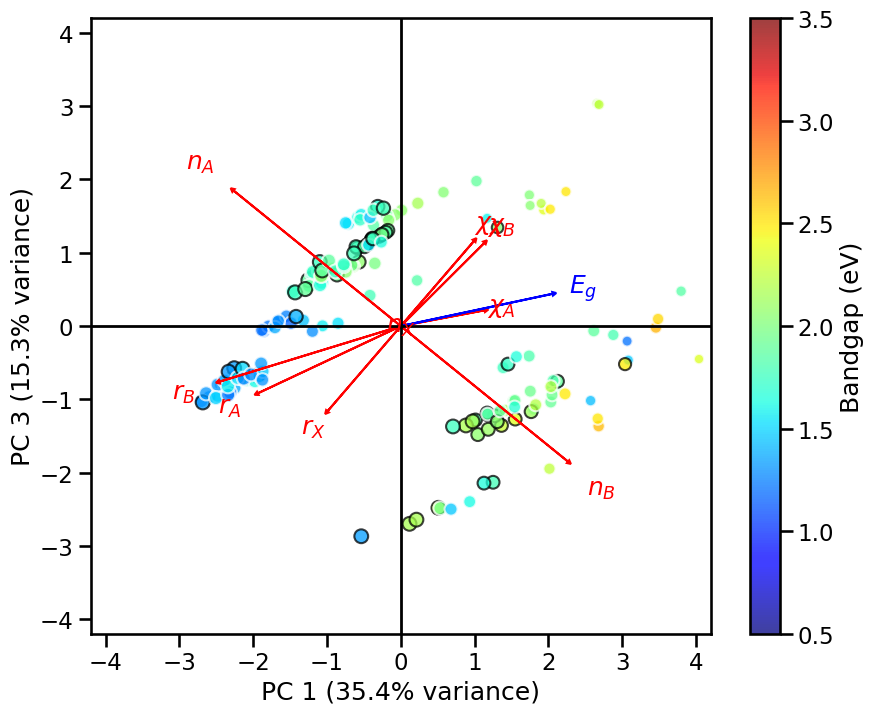

In [21]:
plot_PCA(df_scaled, df_pca, df_sisso, component_loadings, pca, pc1=1, pc2=3)

In [22]:
df_crystal_sisso_all = df_crystal_sisso.merge(df_hhi[['formula', 'HHI', 'SR']], on='formula', how='left')
df_crystal_sisso_all.to_csv(PROCESSED_DATA_DIR / "crystal_sisso_hhi_sr.csv", index=False)